In [1]:
import sys
import os

source_path = 'C:/Users/User/Desktop/Dyslexia project/Source'

if source_path not in sys.path:
    sys.path.append(source_path)
    

import data_manipulation as dm 
import data_visualization as dv
import data_processing as dp

In [2]:
import numpy as np
from model_test import Test
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
data = dm.read_data('reduced_data.xlsx')
data

,ID,BHK_raw_quality_score,median_Freq_speed,mean_d_P,dist_Freq_tilt_x,dist_Freq_speed,median_Freq_tilt_y,Space_Between_Words,bandwidth_tilt_x,std_d_P,mean_Pressure,in_Air,BHK_raw_speed_score,std_Density,median_Freq_tremolo,Age,Dysgraphia
0,S0995,25.500000,0.001744,0.130777,0.000498,0.000218,0.003318,1617.671646,0.004491,3.562989,592.221130,0.621097,207.000000,360.244714,0.003316,9,1
1,S0996,35.000000,0.001564,0.039345,0.000910,0.000126,0.003324,1714.428471,0.004954,1.495864,375.740844,0.587173,63.000000,303.268265,0.003233,9,1
2,S0997,31.333333,0.002356,-0.007538,0.000242,0.001056,0.003333,423.105339,0.003083,0.562388,127.736338,0.610327,74.000000,267.878028,0.003295,8,1
3,S1000,31.000000,0.001599,0.030485,0.000604,0.000136,0.003273,2371.746011,0.005016,1.560180,427.952813,0.604755,52.500000,205.989012,0.003344,8,1
4,S1001,22.666667,0.002250,0.025525,0.000704,0.000899,0.003388,926.590647,0.004022,1.788618,319.640759,0.770747,86.333333,230.280797,0.003338,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,S1376,34.500000,0.001715,0.004184,0.000721,0.000263,0.003367,1033.910155,0.004639,1.371368,332.983967,0.385017,105.500000,308.338614,0.003361,7,1
276,S1379,28.500000,0.002029,0.024090,0.000357,0.000527,0.003295,699.553191,0.003769,1.821784,301.977176,0.591674,201.000000,104.431172,0.003380,11,1
277,S1383,25.000000,0.002119,0.023631,0.000452,0.000781,0.003277,668.460279,0.004270,1.149694,221.949038,0.578211,158.500000,262.934937,0.003352,11,1
278,S1384,25.000000,0.002154,-0.005571,0.000195,0.000747,0.003336,75.451084,0.003236,0.808330,185.984346,0.400375,94.500000,320.034516,0.003328,10,1


In [6]:
X, y = data.drop(['Dysgraphia', 'ID'], axis = 1), data['Dysgraphia']
X = dm.sort_dataFrame(X)
X.head()

,BHK_raw_quality_score,BHK_raw_speed_score,median_Freq_speed,mean_d_P,median_Freq_tilt_y,mean_Pressure,median_Freq_tremolo,dist_Freq_tilt_x,dist_Freq_speed,Space_Between_Words,bandwidth_tilt_x,std_d_P,std_Density,in_Air,Age
0,25.500000,207.000000,0.001744,0.130777,0.003318,592.221130,0.003316,0.000498,0.000218,1617.671646,0.004491,3.562989,360.244714,0.621097,9
1,35.000000,63.000000,0.001564,0.039345,0.003324,375.740844,0.003233,0.000910,0.000126,1714.428471,0.004954,1.495864,303.268265,0.587173,9
2,31.333333,74.000000,0.002356,-0.007538,0.003333,127.736338,0.003295,0.000242,0.001056,423.105339,0.003083,0.562388,267.878028,0.610327,8
3,31.000000,52.500000,0.001599,0.030485,0.003273,427.952813,0.003344,0.000604,0.000136,2371.746011,0.005016,1.560180,205.989012,0.604755,8
4,22.666667,86.333333,0.002250,0.025525,0.003388,319.640759,0.003338,0.000704,0.000899,926.590647,0.004022,1.788618,230.280797,0.770747,9


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle=True, 
                                                    stratify = y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
tst = Test(RandomForestClassifier(random_state = 0,))
tst.cross_validation_scores(X_train, y_train)

,Mean,STD
Accuracy,0.964231,0.020578
Recall,0.833333,0.104305
Precision,1.000000,0.000000
F1_Score,0.905219,0.068062


Accuracy: 0.9404761904761905, Recall: 0.7368421052631579, Precision: 1.0, F1_Score: 0.8484848484848484
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        65
           1       1.00      0.74      0.85        19

    accuracy                           0.94        84
   macro avg       0.96      0.87      0.91        84
weighted avg       0.94      0.94      0.94        84



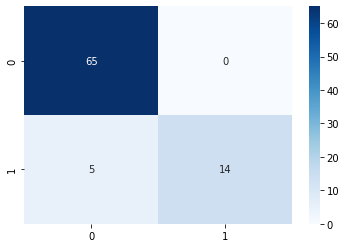

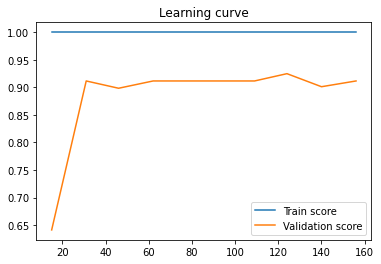

In [9]:
model = tst.train_test_report(X_train, y_train, X_test, y_test)

# Polynomial Features

In [10]:
from sklearn.feature_selection import SequentialFeatureSelector

In [11]:
poly_data = dp.PolynomialFeatures_labeled(X, 2).drop(['Constant Term'], axis = 1)
poly_data.head()

,BHK_raw_quality_score**1,BHK_raw_speed_score**1,median_Freq_speed**1,mean_d_P**1,median_Freq_tilt_y**1,mean_Pressure**1,median_Freq_tremolo**1,dist_Freq_tilt_x**1,dist_Freq_speed**1,Space_Between_Words**1,...,std_d_P**2,std_d_P**1 x std_Density**1,std_d_P**1 x in_Air**1,std_d_P**1 x Age**1,std_Density**2,std_Density**1 x in_Air**1,std_Density**1 x Age**1,in_Air**2,in_Air**1 x Age**1,Age**2
0,25.500000,207.000000,0.001744,0.130777,0.003318,592.221130,0.003316,0.000498,0.000218,1617.671646,...,12.694889,1283.547894,2.212962,32.066900,129776.253677,223.746952,3242.202422,0.385762,5.589874,81.0
1,35.000000,63.000000,0.001564,0.039345,0.003324,375.740844,0.003233,0.000910,0.000126,1714.428471,...,2.237610,453.648155,0.878331,13.462778,91971.640859,178.070908,2729.414389,0.344772,5.284556,81.0
2,31.333333,74.000000,0.002356,-0.007538,0.003333,127.736338,0.003295,0.000242,0.001056,423.105339,...,0.316281,150.651507,0.343241,4.499108,71758.637992,163.493266,2143.024226,0.372499,4.882618,64.0
3,31.000000,52.500000,0.001599,0.030485,0.003273,427.952813,0.003344,0.000604,0.000136,2371.746011,...,2.434162,321.379981,0.943527,12.481442,42431.472982,124.572954,1647.912094,0.365729,4.838043,64.0
4,22.666667,86.333333,0.002250,0.025525,0.003388,319.640759,0.003338,0.000704,0.000899,926.590647,...,3.199154,411.884328,1.378571,16.097560,53029.245559,177.488152,2072.527175,0.594050,6.936720,81.0


In [12]:
poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(poly_data, y, test_size = 0.2, random_state = 0, shuffle=True, 
                                                    stratify = y)
poly_scaler = StandardScaler()
poly_X_train = pd.DataFrame(poly_scaler.fit_transform(poly_X_train), columns = poly_data.columns)
poly_X_test = pd.DataFrame(poly_scaler.transform(poly_X_test), columns = poly_data.columns)
poly_X_train.head()

,BHK_raw_quality_score**1,BHK_raw_speed_score**1,median_Freq_speed**1,mean_d_P**1,median_Freq_tilt_y**1,mean_Pressure**1,median_Freq_tremolo**1,dist_Freq_tilt_x**1,dist_Freq_speed**1,Space_Between_Words**1,...,std_d_P**2,std_d_P**1 x std_Density**1,std_d_P**1 x in_Air**1,std_d_P**1 x Age**1,std_Density**2,std_Density**1 x in_Air**1,std_Density**1 x Age**1,in_Air**2,in_Air**1 x Age**1,Age**2
0,-0.034079,-0.821585,-0.523522,-0.321278,-0.347426,0.680450,0.565575,-0.956356,-0.297489,0.681524,...,-0.779802,-0.229515,-0.738470,-0.981243,0.084904,0.106242,-0.149072,-0.261404,-1.057682,-1.144686
1,-0.971540,0.049583,-1.038495,-0.615620,-0.164755,-1.382418,0.650262,-0.715105,0.454431,1.547312,...,-1.149519,-1.229335,-1.404697,-1.050168,-0.723511,-0.750295,-0.637985,-0.726179,-0.435649,0.067116
2,0.814101,-0.452808,1.049341,-1.658691,0.775596,-0.688172,1.238644,1.405864,-0.026736,0.258456,...,-0.557128,-1.058492,-0.532164,-0.352859,-0.885140,-0.893065,-0.961307,-0.383368,-0.104723,0.067116
3,-0.368886,-0.778828,0.188094,-0.213992,0.363648,-0.565248,0.314451,-0.180499,-0.986655,-0.042761,...,-0.785292,-1.128299,-0.537076,-0.588913,-0.856430,-0.732580,-0.898154,0.310503,0.502085,0.067116
4,-1.507233,0.006826,-0.178340,-0.442702,-0.446404,-1.319479,-1.259262,-0.363530,-0.901944,0.795554,...,-0.584734,-1.302331,-0.689873,-0.601670,-1.006483,-1.142472,-1.379894,-0.666837,-0.866503,-0.576654


In [13]:
selector = SequentialFeatureSelector(RandomForestClassifier(random_state = 0),
                                    cv = 5, scoring = 'recall', n_features_to_select = 'auto',
                                    direction = 'forward', tol = 0.00000001)

In [14]:
selector.fit(poly_X_train, poly_y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=0),
                          n_features_to_select='auto', scoring='recall',
                          tol=1e-08)

In [15]:
new_features = list(selector.get_feature_names_out())

In [16]:
new_features

['BHK_raw_quality_score**1 x median_Freq_speed**1',
 'BHK_raw_quality_score**1 x Age**1',
 'BHK_raw_speed_score**1 x mean_Pressure**1',
 'median_Freq_speed**1 x bandwidth_tilt_x**1']

## Selected features 
'BHK_raw_quality_score**1 x median_Freq_speed**1', 'BHK_raw_quality_score**1 x Age**1', 'BHK_raw_speed_score**1 x mean_Pressure**1', 'median_Freq_speed**1 x bandwidth_tilt_x**1'

In [17]:
sfs_test = Test(model = RandomForestClassifier(random_state = 0), n_folds = 5)
scores = sfs_test.cross_validation_scores(poly_X_train[new_features], poly_y_train)
scores

,Mean,STD
Accuracy,0.959899,0.025847
Recall,0.880000,0.074833
Precision,0.941818,0.079169
F1_Score,0.907201,0.058473


Accuracy: 0.9285714285714286, Recall: 0.75, Precision: 0.9, F1_Score: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.90      0.75      0.82        12

    accuracy                           0.93        56
   macro avg       0.92      0.86      0.89        56
weighted avg       0.93      0.93      0.93        56



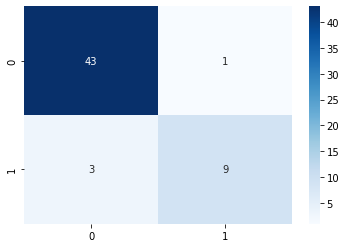

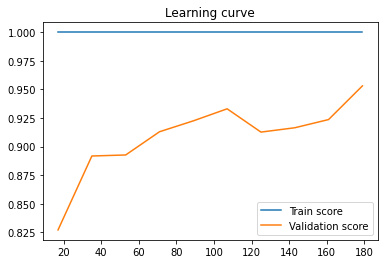

RandomForestClassifier(random_state=0)

In [18]:
sfs_test.train_test_report(poly_X_train[new_features], poly_y_train, poly_X_test[new_features], poly_y_test)

# Genetic Algorithms

In [19]:
from genetic_algorithm import GeneticAlgorithm

In [20]:
parameters = {'n_estimators': np.linspace(start = 2, stop = 150, num = 149).astype(int), 
              'criterion': ['gini', 'entropy', 'log_loss'], 
              'max_depth': np.linspace(start = 2, stop = 100, num = 99).astype(int),
              'bootstrap': [True, False],
              'max_features': ['sqrt', 'log2', None]
             }

In [21]:
optimizer = GeneticAlgorithm(RandomForestClassifier(random_state = 0), parameters, 
                            poly_X_train[new_features], poly_y_train, 6, 1, 60)

In [22]:
parameters = optimizer.evolution()
parameters[0]

{'n_estimators': 148,
 'criterion': 'log_loss',
 'max_depth': 58,
 'bootstrap': True,
 'max_features': None}

In [23]:
final_model = Test(model = RandomForestClassifier(random_state = 0, **parameters[0]), n_folds = 5)
scores = final_model.cross_validation_scores(poly_X_train[new_features], poly_y_train)
scores

,Mean,STD
Accuracy,0.964444,0.030144
Recall,0.900000,0.089443
Precision,0.941818,0.079169
F1_Score,0.917728,0.068614


Accuracy: 0.9464285714285714, Recall: 0.75, Precision: 1.0, F1_Score: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.75      0.86        12

    accuracy                           0.95        56
   macro avg       0.97      0.88      0.91        56
weighted avg       0.95      0.95      0.94        56



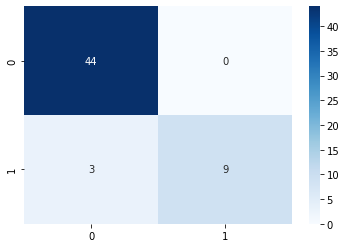

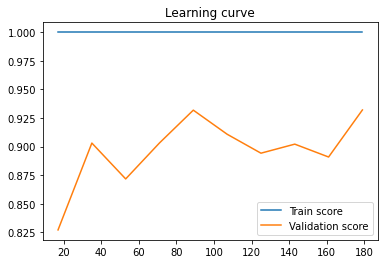

RandomForestClassifier(criterion='log_loss', max_depth=58, max_features=None,
                       n_estimators=148, random_state=0)

In [24]:
final_model.train_test_report(poly_X_train[new_features], poly_y_train, poly_X_test[new_features], poly_y_test)

# Test on Synthetic Data

In [25]:
syn_data = dm.sort_dataFrame(dm.read_data('Synthetic_data.xlsx'))
syn_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [26]:
syn_data.head()

,BHK_raw_quality_score,BHK_raw_speed_score,median_Freq_speed,mean_d_P,median_Freq_tilt_y,mean_Pressure,median_Freq_tremolo,dist_Freq_tilt_x,dist_Freq_speed,Space_Between_Words,bandwidth_tilt_x,std_d_P,std_Density,in_Air,Age,Dysgraphia
0,21.333333,58.333333,0.001132,0.096496,0.003374,588.924280,0.003335,0.000225,0.000355,1418.925895,0.003258,1.335429,252.647261,0.543732,6,0
1,20.333333,101.333333,0.001050,0.191805,0.003336,460.662390,0.003334,0.000237,0.000458,1524.264209,0.003102,1.758775,181.095889,0.540825,6,0
2,16.000000,159.000000,0.001310,0.134668,0.003348,309.809359,0.003373,0.000320,0.000210,1125.804989,0.003230,1.548513,280.365147,0.642660,8,0
3,29.000000,76.000000,0.001128,0.179636,0.003401,489.141456,0.003320,0.000300,0.000368,1678.745264,0.003318,1.802776,285.035458,0.707339,7,0
4,16.500000,167.500000,0.001181,0.204028,0.003370,380.491356,0.003335,0.000233,0.000279,1317.883933,0.003259,2.334114,219.778932,0.574225,10,0


In [27]:
poly_syn_data = dp.PolynomialFeatures_labeled(syn_data.drop('Dysgraphia', axis = 1), power = 2)
poly_syn_data.head()

,Constant Term,BHK_raw_quality_score**1,BHK_raw_speed_score**1,median_Freq_speed**1,mean_d_P**1,median_Freq_tilt_y**1,mean_Pressure**1,median_Freq_tremolo**1,dist_Freq_tilt_x**1,dist_Freq_speed**1,...,std_d_P**2,std_d_P**1 x std_Density**1,std_d_P**1 x in_Air**1,std_d_P**1 x Age**1,std_Density**2,std_Density**1 x in_Air**1,std_Density**1 x Age**1,in_Air**2,in_Air**1 x Age**1,Age**2
0,1.0,21.333333,58.333333,0.001132,0.096496,0.003374,588.924280,0.003335,0.000225,0.000355,...,1.783370,337.392409,0.726115,8.012572,63830.638339,137.372384,1515.883564,0.295644,3.262392,36.0
1,1.0,20.333333,101.333333,0.001050,0.191805,0.003336,460.662390,0.003334,0.000237,0.000458,...,3.093289,318.506875,0.951189,10.552648,32795.721121,97.941149,1086.575336,0.292491,3.244949,36.0
2,1.0,16.000000,159.000000,0.001310,0.134668,0.003348,309.809359,0.003373,0.000320,0.000210,...,2.397892,434.148998,0.995166,12.388102,78604.615540,180.179331,2242.921174,0.413011,5.141276,64.0
3,1.0,29.000000,76.000000,0.001128,0.179636,0.003401,489.141456,0.003320,0.000300,0.000368,...,3.250002,513.855154,1.275174,12.619434,81245.212032,201.616632,1995.248202,0.500328,4.951371,49.0
4,1.0,16.500000,167.500000,0.001181,0.204028,0.003370,380.491356,0.003335,0.000233,0.000279,...,5.448088,512.989070,1.340305,23.341139,48302.778907,126.202448,2197.789319,0.329734,5.742245,100.0


In [28]:
poly_syn_data.drop('Constant Term', axis = 1, inplace = True)

In [29]:
features, target = poly_syn_data, syn_data['Dysgraphia'] 
features = pd.DataFrame(poly_scaler.transform(features), columns = poly_data.columns)
features.head()

,BHK_raw_quality_score**1,BHK_raw_speed_score**1,median_Freq_speed**1,mean_d_P**1,median_Freq_tilt_y**1,mean_Pressure**1,median_Freq_tremolo**1,dist_Freq_tilt_x**1,dist_Freq_speed**1,Space_Between_Words**1,...,std_d_P**2,std_d_P**1 x std_Density**1,std_d_P**1 x in_Air**1,std_d_P**1 x Age**1,std_Density**2,std_Density**1 x in_Air**1,std_Density**1 x Age**1,in_Air**2,in_Air**1 x Age**1,Age**2
0,0.546255,-1.315068,-0.935481,-0.801240,1.040428,0.842800,0.693411,-0.234648,0.308929,0.136974,...,-1.090830,-0.458211,-1.112791,-1.435591,0.371962,0.384048,-0.252778,-0.065976,-1.473912,-1.636980
1,0.412332,-0.855434,-1.184435,0.055361,-0.109291,-0.136822,0.687385,-0.150246,0.805664,0.404454,...,-0.720325,-0.545398,-0.601172,-1.137612,-0.376655,-0.230702,-0.814273,-0.096166,-1.491619,-1.636980
2,-0.168002,-0.239025,-0.391874,-0.458165,0.239745,-1.288986,0.907191,0.435337,-0.382778,-0.607334,...,-0.917015,-0.011529,-0.501206,-0.922293,0.728337,1.051427,0.698120,1.057836,0.433500,-0.576654
3,1.572998,-1.126226,-0.948323,-0.054015,1.827117,0.080692,0.606013,0.289290,0.371089,0.796721,...,-0.676000,0.356440,0.135282,-0.895156,0.792033,1.385644,0.374187,1.893913,0.240712,-1.144686
4,-0.101040,-0.148167,-0.785675,0.165215,0.911600,-0.749141,0.694076,-0.175872,-0.050880,-0.119597,...,-0.054280,0.352442,0.283334,0.362618,-0.002597,0.209904,0.639092,0.260437,1.043594,0.786623


In [30]:
sfs_test.test_on_synthetic_data(features[new_features], target)

Accuracy: 0.9808917197452229, Recall: 0.9259259259259259, Precision: 0.9615384615384616, F1_Score: 0.9433962264150944


# Training the final classifier

In [31]:
from sklearn.pipeline import Pipeline

In [39]:
model = Pipeline([('std_sca' ,StandardScaler()), ('rf', RandomForestClassifier(random_state = 0, **parameters[0]))])

In [40]:
X_final = dp.PolynomialFeatures_labeled(X, 2)
X_final = X_final[new_features]
X_final.head()

,BHK_raw_quality_score**1 x median_Freq_speed**1,BHK_raw_quality_score**1 x Age**1,BHK_raw_speed_score**1 x mean_Pressure**1,median_Freq_speed**1 x bandwidth_tilt_x**1
0,0.044469,229.500000,122589.773951,0.000008
1,0.054732,315.000000,23671.673159,0.000008
2,0.073825,250.666667,9452.489034,0.000007
3,0.049572,248.000000,22467.522688,0.000008
4,0.051008,204.000000,27595.652184,0.000009


In [41]:
model.fit(X_final, y)

Pipeline(steps=[('std_sca', StandardScaler()),
                ('rf',
                 RandomForestClassifier(criterion='log_loss', max_depth=58,
                                        max_features=None, n_estimators=148,
                                        random_state=0))])

In [42]:
preds = model.predict(X_final)

In [43]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [44]:
print('Accuracy: {}, Recall: {}, Precision: {}, F1: {}'.format(accuracy_score(y, preds), recall_score(y, preds), precision_score(y, preds), f1_score(y, preds)))

Accuracy: 1.0, Recall: 1.0, Precision: 1.0, F1: 1.0


In [45]:
import pickle 
with open('C:/Users/User/Desktop/Dyslexia project/Models/rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)